# model 1
* $C(t)$: *C. glutamicum* (Coryne) population

$$
\frac{dC}{dt} = \mu_C   \cdot C   - \theta \cdot C^2
$$


* density loss

$$
\theta = \frac{\mu C -   \frac{dC}{dT}}{C^2}
$$

* new population growth rate

$$
\mu = \frac{\frac{dC}{dT}-\bar{\theta}\cdot C^2 }{ C }
$$

**Parameter :**

* $\mu$: growth rate
* $\theta$: density loss
* $C$: Coryne population 
* $\frac{dC}{dT}$: rate of change of $C$ over time
* $a_c$: affinity coefficient
* $\bar{\theta}$: average density loss



dC/dt: [3.21428571 3.57142857 3.57142857 1.07142857]
Theta values: [0.00671429 0.00400794 0.00212828 0.00078855]
0.0034


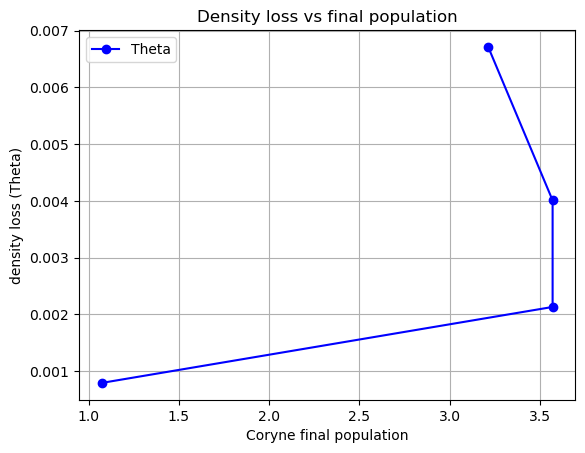

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Time step (14 hrs. We take readings after each 14 hrs)
dT = 14

# Example C values at two different times
C_old = np.array([5, 10, 20, 100])  # C at T = previous time
C_new = np.array([50, 60, 70, 115])  # C at T = current time

# Compute dC/dT using finite difference
dC_dT = (C_new - C_old) / dT

# mu values
mu = np.array([0.4, 0.3, 0.2, 0.1])

# Current C values
C = C_new


# Function to compute theta
def compute_theta(C, mu, dC_dT):
    return ((mu * C) - (dC_dT)) /( C*C)


# Compute theta
theta = compute_theta(C, mu, dC_dT)
avg_theta = np.mean(theta)

# Print results
print("dC/dt:", dC_dT)
print("Theta values:", theta)
print(f"{avg_theta:.4f}")

# Optional plot
plt.plot(dC_dT, theta, marker="o", color="blue")
plt.xlabel("Coryne final population")
plt.ylabel("density loss (Theta)")
plt.title("Density loss vs final population")
plt.legend(["Theta"])
plt.grid(True)
plt.show()


# Growth rate prediction for new density population

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Function to compute mu
def compute_mu(C, dC_dT, ac, avg_theta):
    return dC_dT / (ac * C * (1 - avg_theta))


# Intensity calculation based on theta values
ac = 1

# Time step (14 hrs. We take readings after each 14 hrs)
dT = 7

# Example C values at two different times
C_old = np.array([1000, 2000, 2500, 3000])  # C at T = previous time
C_new = np.array([1900, 2750, 3100, 3500])  # C at T = current time

# Compute dC/dT using finite difference
dC_dT = (C_new - C_old) / dT

# Current C values
C = C_new

# Assuming avg_theta is already defined elsewhere
# You can define it like this if needed:
# avg_theta = 0.01  # or any value based on context

ans = compute_mu(C, dC_dT, ac, avg_theta)

print(ans)
print(dC_dT)

plt.bar(C, ans, color="blue", width=40)
plt.xlabel("Coryne population")
plt.ylabel("Growth rate (1/h)")
plt.title("Coryne Growth Rate")
plt.legend(["Growth rate"])
plt.grid(True)
plt.show()


# model 2(population dynamics)


* $E(t)$: *E. coli* population
* $C(t)$: *C. glutamicum* (Coryne) population

$$
\frac{dE}{dt} = \mu_E \cdot a_E  \cdot E - \delta_E \cdot E
$$

$$
\frac{dC}{dt} = \mu_C \cdot a_C  \cdot C \cdot  - \theta \cdot C^2 
$$

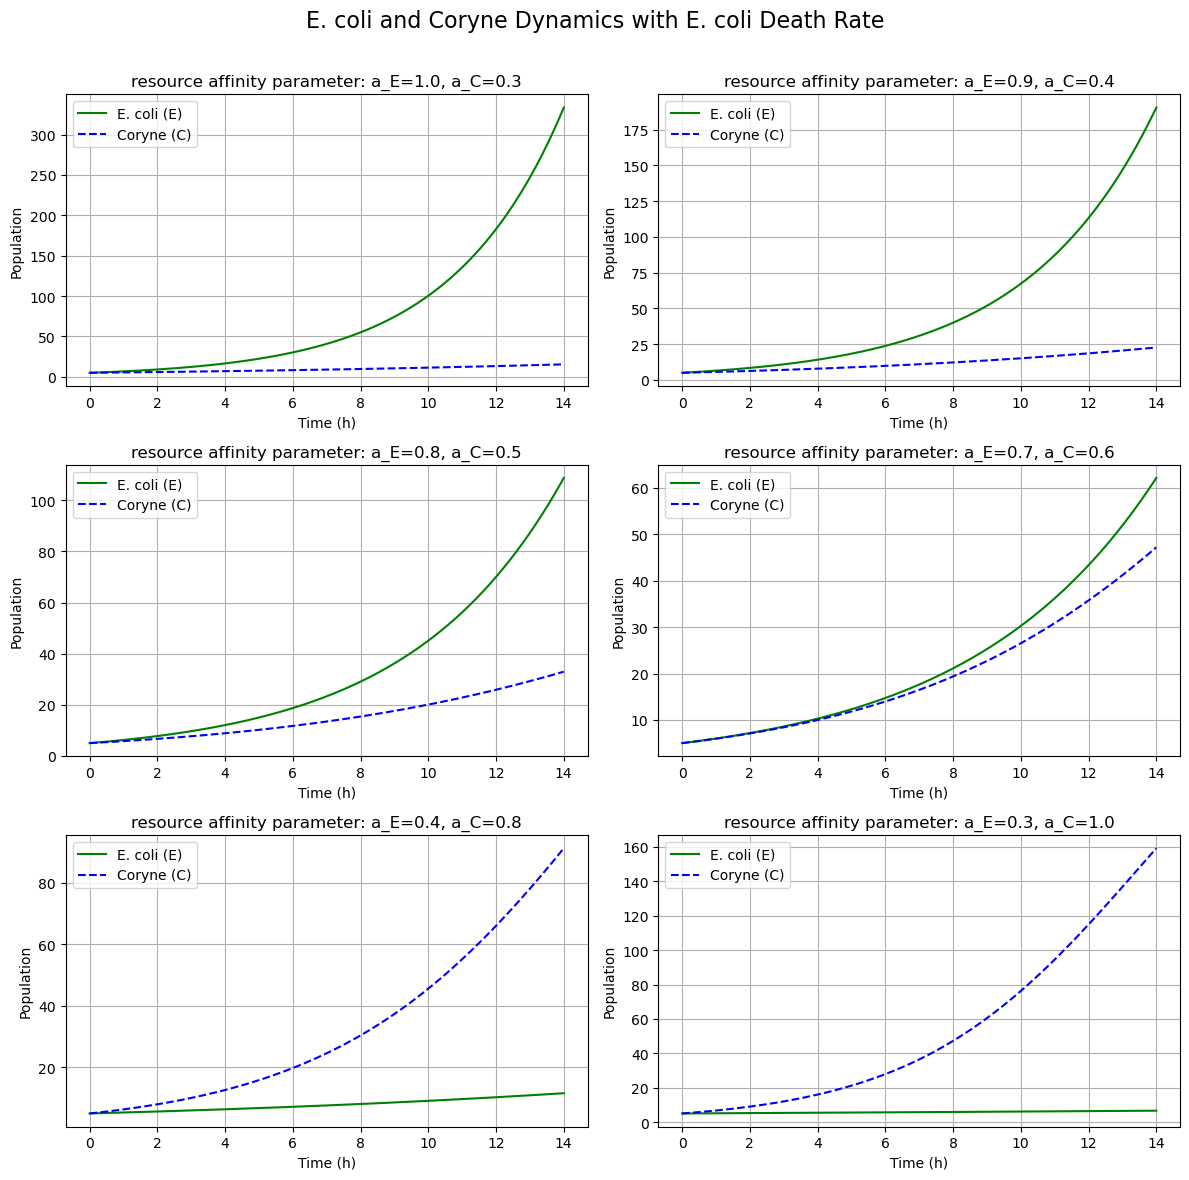

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Fixed parameters
mu_E = 0.4  # growth rate of E. coli
mu_C = 0.3  # growth rate of Coryne
delta_E = 0.1  # death rate of E. coli
theta = 0.001  # density loss for Coryne
t_span = (0, 14)
t_eval = np.linspace(*t_span, 500)
E0, C0 = 5, 5
y0 = [E0, C0]

# 6 allocation coefficient scenarios
scenarios = [
    (1.0, 0.3),  # a_E > a_C
    (0.9, 0.4),  # a_E > a_C
    (0.8, 0.5),  # a_E > a_C
    (0.7, 0.6),  # a_E > a_C
    (0.4, 0.8),  # a_C > a_E
    (0.3, 1.0),  # a_C > a_E
]

# Setup plot
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

# Simulate each scenario
for i, (a_E, a_C) in enumerate(scenarios):

    def population_dynamics(t, y):
        E, C = y
        dE_dt = (mu_E * a_E - delta_E) * E
        dC_dt =( mu_C * a_C * C  - theta * C* C)
        return [dE_dt, dC_dt]

    sol = solve_ivp(population_dynamics, t_span, y0, t_eval=t_eval)
    E_vals, C_vals = sol.y

    ax = axes[i]
    ax.plot(sol.t, E_vals, label="E. coli (E)", color="green")
    ax.plot(sol.t, C_vals, label="Coryne (C)", color="blue", linestyle="--")
    ax.set_title(f"resource affinity parameter: a_E={a_E}, a_C={a_C}")
    ax.set_xlabel("Time (h)")
    ax.set_ylabel("Population")
    ax.legend()
    ax.grid(True)

plt.suptitle("E. coli and Coryne Dynamics with E. coli Death Rate", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


# Model 3(dynamic resource)


* $E(t)$: *E. coli* population
* $C(t)$: *C. glutamicum* (Coryne) population
* $B(t)$: Enterobactin concentration

$$
\frac{dE}{dt} = \mu_E \cdot \frac{a_E \cdot B}{K_E +  B} \cdot E - \delta_E \cdot E
$$

$$
\frac{dC}{dt} = \mu_C \cdot \frac{a_C \cdot B}{K_C +   B} \cdot C \cdot \left(1 - \theta \cdot C\right) - \delta_C \cdot C
$$

$$
\frac{dB}{dt} = r_{\text{prod}} \cdot E - r_{\text{cons,E}} \cdot \left( \mu_E \cdot \frac{a_E \cdot B}{K_E + a_E \cdot B} \cdot E \right) - r_{\text{cons,C}} \cdot \left( \mu_C \cdot \frac{a_C \cdot B}{K_C + a_C \cdot B} \cdot C \right)
$$